## Data Replication

In [ ]:
import os
import cv2
import random
import albumentations as A

augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.4),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    A.Rotate(limit=15, p=0.2),
    A.RandomScale(scale_limit=(-0.2, 0), p=0.5)
])

def augment_and_save(image_path, output_path, augment_count=5):
    image_test = cv2.imread(image_path)
    if image_test is None:
        print(f"Error loading image: {image_path}")
        return
    image_name = os.path.splitext(os.path.basename(image_path))[0]

    for i in range(augment_count):
        augmented_image = augmentations(image=image_test)['image']
        augmented_name = f"{image_name}_aug_{i}.jpg"
        cv2.imwrite(os.path.join(output_path, augmented_name), augmented_image)

input_folder = "plantv2"
output_folder = "augmented_plant01"
os.makedirs(output_folder, exist_ok=True)

for class_name in os.listdir(input_folder):

    class_path = os.path.join(input_folder, class_name)
    if not os.path.isdir(class_path):
        continue
    output_class_path = os.path.join(output_folder, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    images_test = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg','.JPG'))]
    if not images_test:
        print(f"No images found in {class_path}")
        continue

    random_images = random.sample(images_test, min(len(images_test), 500))
    for img_path in random_images:
        augment_and_save(img_path, output_class_path, augment_count=1)

    print(f"Class: {class_name}, augmented length: {len(os.listdir(output_class_path))}")

print("Veri arttırma işlemi tamamlandı!")

Class: Pepper,_bell___healthy, augmented length: 1000
Class: Corn___Common_rust, augmented length: 1000
Class: Tomato___Bacterial_spot, augmented length: 1000
Class: Tomato___healthy, augmented length: 1000
Class: Pepper,_bell___Bacterial_spot, augmented length: 1000
Class: Corn___Northern_Leaf_Blight, augmented length: 1000
Class: Corn___healthy, augmented length: 1000
Class: Apple___healthy, augmented length: 1000
Class: Cherry___healthy, augmented length: 1000
Class: Apple___Black_rot, augmented length: 1000
Class: Cherry___Powdery_mildew, augmented length: 1000
Veri arttırma işlemi tamamlandı!


In [ ]:
import cv2
import os
import random
import numpy as np
from collections import Counter

def augment_and_append(input_folder, temp_images, temp_labels, maks_img_size):
    class_distribution = Counter(labels)
    for class_name in os.listdir(input_folder):
      class_path = os.path.join(input_folder, class_name)
      if not os.path.isdir(class_path):
          continue

      current_count = class_distribution.get(class_name, 0)
      if maks_img_size > current_count:
        img_size = maks_img_size - current_count
        available_images = os.listdir(class_path)
        img_size = min(img_size, len(available_images))
        print(f"class name: {class_name}, current size: {current_count}, append size: {img_size}, total size: {img_size+current_count}")
      else:
        print(f"class name: {class_name}, append size: 0, total size: {current_count}")
        continue

      if img_size <= 0:
        continue

      rand_class_path = random.sample(available_images, img_size)

      for img in rand_class_path:
        img_path = os.path.join(class_path, img)
        img = cv2.imread(img_path)
        temp_images.append(img)
        temp_labels.append(class_name)
    return temp_images, temp_labels

input_folder = "augmented_plant01"
temp_images = []
temp_labels = []
temp_images, temp_labels = augment_and_append(input_folder, temp_images, temp_labels, 2000)
print(f"Size: {len(temp_labels)}")

class name: Apple___Black_rot, current size: 621, append size: 1000, total size: 1621
class name: Apple___healthy, current size: 1645, append size: 355, total size: 2000
class name: Corn___Common_rust, current size: 1192, append size: 808, total size: 2000
class name: Pepper,_bell___Bacterial_spot, current size: 997, append size: 1000, total size: 1997
class name: Corn___Northern_Leaf_Blight, current size: 985, append size: 1000, total size: 1985
class name: Tomato___Bacterial_spot, append size: 0, total size: 2127
class name: Cherry___Powdery_mildew, current size: 1052, append size: 948, total size: 2000
class name: Tomato___healthy, current size: 1631, append size: 369, total size: 2000
class name: Cherry___healthy, current size: 854, append size: 1000, total size: 1854
class name: Pepper,_bell___healthy, current size: 1478, append size: 522, total size: 2000
class name: Corn___healthy, current size: 1162, append size: 838, total size: 2000
Size: 7840


## Preparation of Data Set

In [ ]:
!pip install pennylane
!pip install torchinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

def load_images_and_labels(base_dir):
    images = []
    labels = []
    for label in os.listdir(base_dir):
        label_path = os.path.join(base_dir, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                file_path = os.path.join(label_path, file)
                try:
                  img = cv2.imread(file_path)
                  if img is not None:
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                  print(f"Hata: {file_path} yüklenemedi. Hata: {e}")

    return images, labels

base_directory = "plantv2"

images, labels = load_images_and_labels(base_directory)
print(f"Toplam veri sayısı: {len(labels)}")

Toplam veri sayısı: 13744


In [ ]:
import pickle

with open("images02.pkl", "wb") as file:
    pickle.dump(images, file)

with open("labels02.pkl", "wb") as file:
    pickle.dump(labels, file)

In [ ]:
import pickle
import os
import cv2
import numpy as np

with open('images.pkl', 'rb') as pickle_file:
    images = pickle.load(pickle_file)

with open('labels.pkl', 'rb') as pickle_file:
    labels = pickle.load(pickle_file)

print(f"Size: {len(labels)}")
print(f"Size images: {len(images)}")

Size: 17092
Size images: 17092


In [ ]:
new_dataset_images = images + temp_images
new_dataset_labels = labels + temp_labels
print(f"Size: {len(new_dataset_labels)}")
print(f"Size images: {len(new_dataset_images)}")

Size: 21584
Size images: 21584


In [ ]:
import pickle

with open("aug_images01.pkl", "wb") as file:
    pickle.dump(new_dataset_images, file)

with open("aug_labels01.pkl", "wb") as file:
    pickle.dump(new_dataset_labels, file)

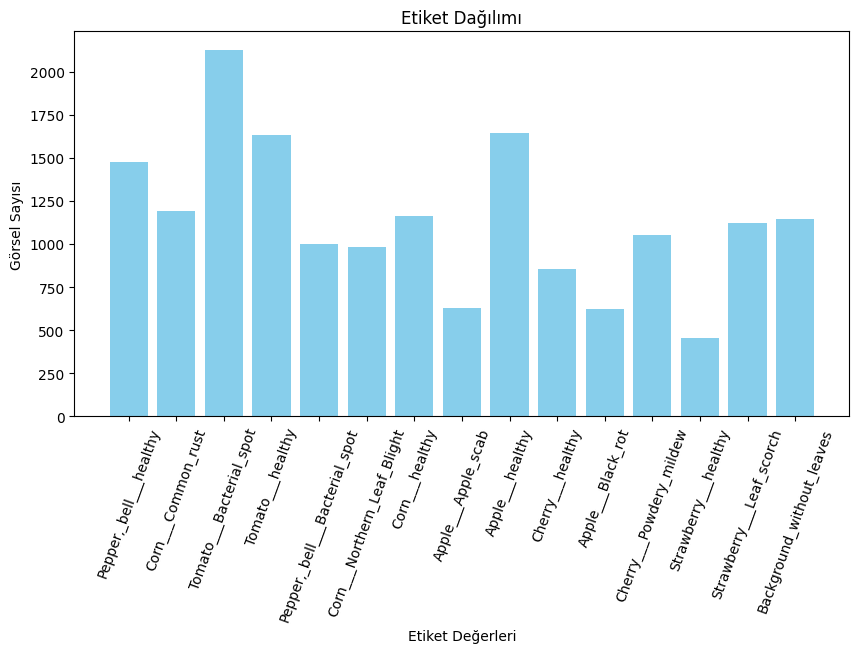

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

label_counts = Counter(labels)
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel("Etiket Değerleri")
plt.ylabel("Görsel Sayısı")
plt.title("Etiket Dağılımı")
plt.xticks(rotation=70)
plt.show()

In [ ]:
images = new_dataset_images
labels = new_dataset_labels

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import datetime

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)

        return image, label

In [ ]:
from torchvision import transforms
from PIL import Image

image_testing = Image.open("/Apple___Black_rot/image (1).JPG")
transform_test = transforms.ToTensor()
tensor_test = transform_test(image_testing)
print("Tensor Shape:", tensor_test.shape)

Tensor Shape: torch.Size([3, 256, 256])


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

#labels_tensor = torch.tensor(encoded_labels).long()
print("Encoded labels:", encoded_labels)
#print("Tensor labels:", labels_tensor)
print("Classes (etiketlerin sayıya karşılık geldiği değerler):", encoder.classes_)
print("Toplam sınıf sayısı:", len(encoder.classes_))
classes = encoder.classes_

Encoded labels: [8 8 8 ... 6 6 6]
Classes (etiketlerin sayıya karşılık geldiği değerler): ['Apple___Black_rot' 'Apple___healthy' 'Cherry___Powdery_mildew'
 'Cherry___healthy' 'Corn___Common_rust' 'Corn___Northern_Leaf_Blight'
 'Corn___healthy' 'Pepper,_bell___Bacterial_spot' 'Pepper,_bell___healthy'
 'Tomato___Bacterial_spot' 'Tomato___healthy']
Toplam sınıf sayısı: 11


In [ ]:
# Sınıf isimleri
classes = ['Apple___Black_rot', 'Apple___healthy', 'Cherry___Powdery_mildew',
 'Cherry___healthy', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight',
 'Corn___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
 'Tomato___Bacterial_spot', 'Tomato___healthy']

class_to_index = {name: idx for idx, name in enumerate(classes)}  # İsim -> Sayısal
index_to_class = {idx: name for idx, name in enumerate(classes)}  # Sayısal -> İsim
encoded_labels = [class_to_index[label] for label in labels]

print("Class to Index:", class_to_index)
print("Index to Class:", index_to_class)
print("Encoded Labels:", encoded_labels)

Class to Index: {'Apple___Black_rot': 0, 'Apple___healthy': 1, 'Cherry___Powdery_mildew': 2, 'Cherry___healthy': 3, 'Corn___Common_rust': 4, 'Corn___Northern_Leaf_Blight': 5, 'Corn___healthy': 6, 'Pepper,_bell___Bacterial_spot': 7, 'Pepper,_bell___healthy': 8, 'Tomato___Bacterial_spot': 9, 'Tomato___healthy': 10}
Index to Class: {0: 'Apple___Black_rot', 1: 'Apple___healthy', 2: 'Cherry___Powdery_mildew', 3: 'Cherry___healthy', 4: 'Corn___Common_rust', 5: 'Corn___Northern_Leaf_Blight', 6: 'Corn___healthy', 7: 'Pepper,_bell___Bacterial_spot', 8: 'Pepper,_bell___healthy', 9: 'Tomato___Bacterial_spot', 10: 'Tomato___healthy'}
Encoded Labels: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [ ]:
unique, counts = np.unique(encoded_labels, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label} appears {count} count")

Label 0 appears 1621 count
Label 1 appears 2000 count
Label 2 appears 2000 count
Label 3 appears 1854 count
Label 4 appears 2000 count
Label 5 appears 1985 count
Label 6 appears 2000 count
Label 7 appears 1997 count
Label 8 appears 2000 count
Label 9 appears 2127 count
Label 10 appears 2000 count


In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_data = CustomDataset(
    images= images,
    labels= encoded_labels,
    transform=transform
)

In [ ]:
for img, label in train_data:
    print(f"Image Shape: {img.shape}, Label: {label}")
    break

Image Shape: torch.Size([3, 64, 64]), Label: 8


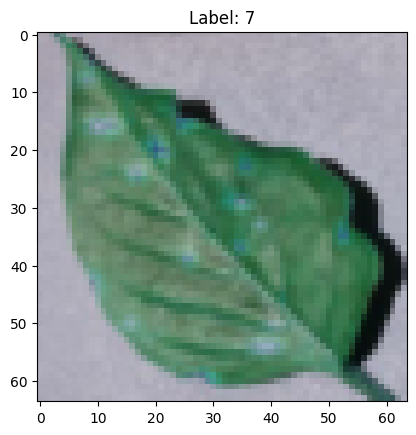

In [ ]:
import matplotlib.pyplot as plt

img, label = train_data[6500]
img = img.permute(1, 2, 0)  #(C, H, W -> H, W, C)
plt.imshow(img)
plt.title(f"Label: {label}")
plt.show()

In [ ]:
for img, label in train_data:
    print(img.min(), img.max())
    break

tensor(0.0078) tensor(0.8667)


In [ ]:
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_set, val_set = torch.utils.data.random_split(train_data, [train_size, val_size])

print(f"Toplam eğitim verisi: {len(train_data)}")
print(f"Eğitim verisi: {len(train_set)}")
print(f"Doğrulama verisi: {len(val_set)}")
image_test, label_test = train_data[0]
print(f"Etiket: {label_test}")
print(f"Görsel boyutu: {image_test.shape}")

Toplam eğitim verisi: 21584
Eğitim verisi: 17267
Doğrulama verisi: 4317
Etiket: 8
Görsel boyutu: torch.Size([3, 64, 64])


In [ ]:
batch_size = 4
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True,)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)